# 1. Linear Regression using Closed-form solution (or The Normal Equation)
The closed-form equation directly computes the model parameters that best fit the model to the training set. i.e., the model parameters that minimize the cost function over the training set.

Linear Regression Prediction Model : y = T(theta_best)*X

**Linear Regression using Normal Equation performs well for Linear data**

### Normal Equation to directly compute model parameter (Theta):
<img src="Images/NormalEquation_LR-1.png" width = "240" height = "300">

### Example - Normal Equation to find Theta

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# to make this notebook's output stable across runs
np.random.seed(42)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)
# i.e., y = 4+3x+SomeGaussianNoise

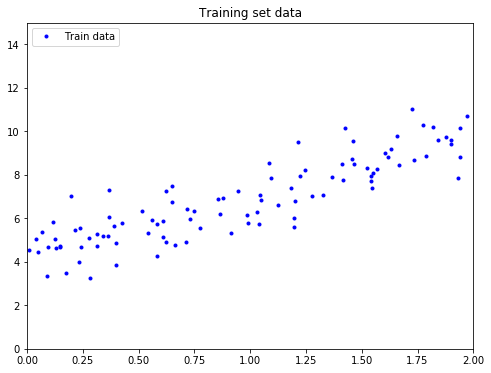

In [2]:
plt.figure(figsize=(8,6))
plt.plot(X,y,"b.", label='Train data')
plt.axis([0,2,0,15])
plt.title('Training set data')
plt.legend(loc='upper left')
plt.show()

In [3]:
#let's write Normal equation Pythonic way
X_b = np.c_[np.ones((100,1)),X] # add X0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

we would have hoped for Theta0 = 4 and Theta1 = 3 exactly. but noise made it impossible to recover the exact parameters of the original function

In [4]:
#Now let's make predictions using the theta_best parameter
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new] #add X0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

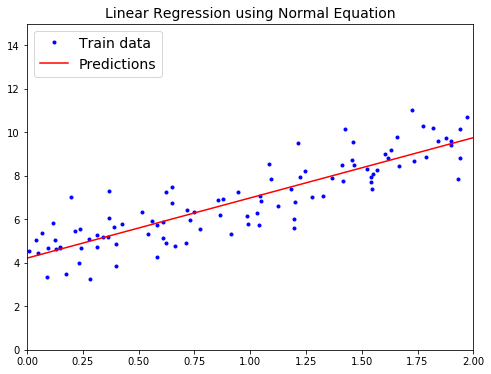

In [5]:
plt.figure(figsize=(8,6))
plt.plot(X,y,'b.', label='Train data')
plt.plot(X_new,y_predict,'r-',label = 'Predictions')
plt.axis([0,2,0,15])
plt.title('Linear Regression using Normal Equation', fontsize=14)
plt.legend(loc='upper left', fontsize=14)
plt.show()

## Equivalent code using Scikit-learn looks like this

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y) #note that X0 = 1 is not added here since sickit-learn does that under the hood
print('intercept (Theta0):',lin_reg.intercept_,'Coeff (Theta1):',lin_reg.coef_)
lin_reg.predict(X_new) #note that X0 = 1 is not added here since sickit-learn does that under the hood

intercept (Theta0): [4.21509616] Coeff (Theta1): [[2.77011339]]


array([[4.21509616],
       [9.75532293]])

**The Normal Equation approach gets very slow when the number of features grows large (ex: 100,000)**

# 2. Linear Regression using Gradient descent
Training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient descent than using the Normal Equation

## Gradient Descent Algorithm:
. It is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. Here, it is used to tweak theta parameters itervatively in order to minimize a cost function

. Concretely you start by filling Theta with random values, and then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (i.e., Mean Squared Error MSE), untill the algorithm converges to a minimum value

. An important pararmeter in Gradient Descent is the size of steps, determined by the learning rate hyperparameter.

. if the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time

. if the learning rate is too high, you might jump accross the valley & end up on the other side, possibly even higher up than you were before.

. **One problem with gradient descent alogrithm is that it will converge at local minimum which is not as good as the global minimum**

## Cost Function
. The MSE cost function for a Linear Regression model happens to be a convex function. This implies that there are no local minima, just one good global minimum.

. **Hence, we use Gradient descent alogirthm to minimize this cost function as it has just a global minima**

**when using Gradient Descent, you should ensure that all features have a similar scale (StandardScaler() or RobustScaler()), orelse it will take much longer time to converge**

### There are 3 types of Gradient descent algorithms:
1. batch gradient descent
2. Stochastic gradient descent
3. Min-batch gradient descent

## Batch Gradient Descent:
it uses whole batch of training data at every step when trying to reduce cost function through gradient descent iteratively. As a result, it is terribly slow on very large training sets.

### Formula for minimizing cost function using batch gradient descent
<img src='Images/GradientDescentStep.jpg'  width = "340" height = "400">

### Formaula for taking every step in Gradient Descent iterations
<img src='Images/Minimize_CostFunction.jpg' width = "340" height = "400">

### Implementation of Batch Gradient Descent

array([[4.21509616],
       [2.77011339]])

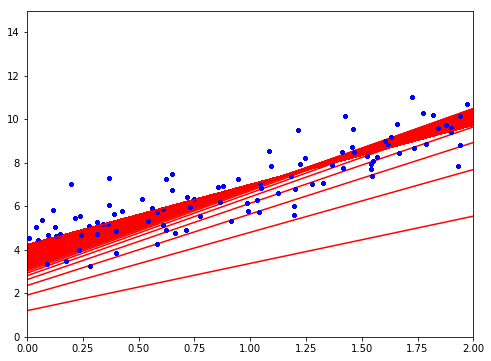

In [14]:
eta = 0.1 #learning rate of gradient descent
n_iterations = 1000
m = 100 #total number of samples

theta_path = []

theta = np.random.rand(2,1) #random initialization of cost function theta

plt.figure(figsize=(8,6))
plt.axis([0,2,0,15])

for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients
    y_predict = X_new_b.dot(theta)
    plt.plot(X,y, 'b.',label='Train data')
    plt.plot(X_new, y_predict,'r-', label='Predictions')
    
#red lines are converging the cost function to local minima
#blue dots are train data
theta

### Hint: to find a good learning rate you can use grid search algorithm.

## Stochastic (Random) Gradient Descent:
This algorithm just picks a random instance in the training set at every step and computes the gradients based only on that single instance. This makes algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets (which was drawback of Batch Gradient descent), since only one instance needs to be in memory at each iteration.

. This algorithm has a better chance of finding the global minimum than batch gradient descent. This is due to its stochastic (random) nature, it jumps out of local minima.

### Implementation of SGDRegression using Scikit-learn:

In [19]:
#penalty=None; this is used to disabling regularization which we'll discuss down the line
#notice that here we are using just 50 iterations to get the best Theta0, Theta1 values

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())
print('intercept (Theta0):',sgd_reg.intercept_,'Coeff (Theta1):',sgd_reg.coef_)
sgd_reg.predict(X_new)

intercept (Theta0): [4.2015412] Coeff (Theta1): [2.75835815]


C:\Users\msdaw\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


array([4.2015412, 9.7182575])

**Note:** Since instances are picked randomly, some instances may be picked several times per epoch (iteration) while others may not be picked at all. If you want to be sure that the algorithm goes through every instance at each epoch, another approach is to shuffle the training set, then go through it instance by instance, then shuffle it again and so on.

## Mini-batch Gradient Descent:
This algorithm at each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called mini-batches.

The main advantage of Mini-batch over stochastic is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

Similar to Batch GD, it is harder for this algorithm to escape from local minima.

In [20]:
### Implementation of Mini-Batch GD
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
        
theta

array([[4.25214635],
       [2.7896408 ]])

# 3. Polynomial Regression
when your data is actually more complex than a simple staright line, you can actually use a linear model to fit nonlinear data.
A simple way to do this is add powers of each feature as new features, then train a linear model on this extended set of features, This technique is called **Polynomial Regression**

you can use Scikit-Learn's PolynomialFeatures class to transform our training data, adding the square of each feature in the training set as new features

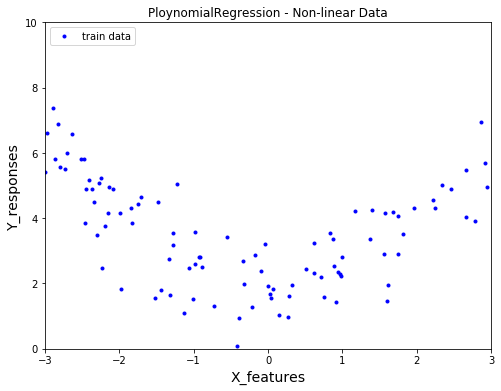

In [25]:
##Example of non-linear data
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2+2+ np.random.randn(m,1)

plt.figure(figsize=(8,6))
plt.plot(X,y,'b.',label='train data')
plt.axis([-3,3,0,10])
plt.xlabel('X_features', fontsize=14)
plt.ylabel('Y_responses', fontsize=14)
plt.title('PloynomialRegression - Non-linear Data')
plt.legend(loc='upper left')
plt.show()

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[0.62278195]
[0.62278195 0.38785736]


In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.95163088]), array([[-0.03635804,  0.4388373 ]]))

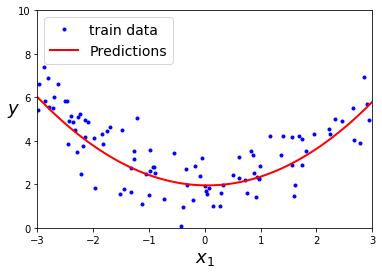

In [28]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

#plt.figure(figsize=(8,6))
plt.plot(X, y, "b." ,label='train data')
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

**Note:** PolynomialFeatures(degree=d) transforms an array containing n features into an array containing (n+d)!/d!.n! features

## Overfitting & Underfitting:
High degree polynomial regression model leads to overfitting of the training data, while the linear model is underfitting it.

if a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. if it performs poorly on both then it is underfitting. This is one way to tell when a model is too simple or too complex.

**if your model is underfitting the training data, adding more training examples will not help. you need to use a more complex model or come up with better features.**

**one way to improve an overfitting model is to feed it more training data until the validation error reaches the training error**

### just use X,y features from above example (without adding any polynomial features) to linear regression algorithm & plot the graph. you can see how underfitting looks like

## Bias/Variance trade off:
A high-bias model is more likely to underfit the training data

A model with many high-degree polynomial features is likely to have high variance, and thus to overfit the training data.

i.e., high-bias = underfitting; high-variance = overfitting; 

increasing a model's complexity will typically increase its variance and reduce its bias. Conversely, reducing a model's complexity increases its bias and reduces its variance. This is why it is called a **bias/variance trade off.**

## Regularization
A good way to reduce overfitting is to regularize the model (i.e, to constrain input features weights). A simple way to regularize a polynomial model is to reduce the number of polynomial degrees.

For a linear model, a regularization is typically achieved by constraining the weights of the model

### Types of Regularization:
1. Ridge Regression
2. Lasso Regression
3. Elastic Net
4. Early stopping

### 1. Ridge Regression:
Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression.

A regularization term is added to the cost function that forces the learning algorithm to not only fit the data but also keep the model weights as small as possible.

The hyperparameter alpha controls how much you want to regularize the model:

    if alpha = 0, the ridge regression is just linear regression
    
    if alpha is very large, all weights end up very close to zero & the result is a flat line going through the data's mean.
    
it is important to scale the data before performing Ridge regression, as it is sensitive to the scale of the input features. This is true for most regularized models.

### implementation of Ridge Regression

In [35]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [37]:
#Alternatively, we can do the same using SGD (Stochastic Gradient Descent), all you have to do is make penalty="l2"
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty='l2', random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.49905184])

In [38]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

### 2. Lasso Regression:
Least Absolute Shrinkage and Selection Operator Regression (Lasso Regression).

just like Ridge regression, it adds regularization term to the cost function, but it uses like l1 norm of the weight vector instead of half the square of the l1 norm

An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important features. i.e, set them to zero. Lasso Regression automatically performs feature selection and outputs a sparse model

### Implementation of Lasso Regression

In [39]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [40]:
#we can do the same using SGD, all you have to do is make penalty="l1"
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty='l1', random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.49903849])

### 3. Elastic Net:
It is a middle ground between Ridge Regression and Lasso Regression.

The regularization term is simple mix of both Ridge and lasso's regularization terms, and you can control the mix ration r.

    when r=0, Elastic Net is equivalent to Ridge Regression
    
    when r=1, it is equivalent to Lasso Regression
    
**Ridge is a good by default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features weights down to zero. In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated**

### Implementation of Elastic Nets:

In [41]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])

# 4. Logistic Regression
Logistict Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class. i.e, it is used for Classification type than a regression type.

if the estimated probability is greater than 50%. then the model predicts that the instance belongs to that class or else it predicts that it does not. (Ex: whether the email is spam or not?)

Just like Linear Regression Model, Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear regression model does, it outputs the logistic of this result.

mathematical formula for Logistic Regression model estimated probability,
<img src='Images/LogisticRegression.jpg'>

Once the Logistic Regression model has estimated the probability **p** that an instance **X** belongs to the positive class, it can make its prediction **y** easily with below formulae,

    y=0 if p<0.5
    y=1 if p >= 0.5

cost function for Logistic regression of a single training instance,

    Cost = -log(p) if y=1
    Cost = -log(1-p) if y=0
    
### Implementation of Logistic Regression

In [42]:
from sklearn.datasets import load_iris
iris = load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [43]:
X = iris['data'][:,3:] #petal width
y=(iris['target'] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

[[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.1]
 [0.1]
 [0.2]
 [0.4]
 [0.4]
 [0.3]
 [0.3]
 [0.3]
 [0.2]
 [0.4]
 [0.2]
 [0.5]
 [0.2]
 [0.2]
 [0.4]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.4]
 [0.1]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0.2]
 [0.3]
 [0.3]
 [0.2]
 [0.6]
 [0.4]
 [0.3]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [1.4]
 [1.5]
 [1.5]
 [1.3]
 [1.5]
 [1.3]
 [1.6]
 [1. ]
 [1.3]
 [1.4]
 [1. ]
 [1.5]
 [1. ]
 [1.4]
 [1.3]
 [1.4]
 [1.5]
 [1. ]
 [1.5]
 [1.1]
 [1.8]
 [1.3]
 [1.5]
 [1.2]
 [1.3]
 [1.4]
 [1.4]
 [1.7]
 [1.5]
 [1. ]
 [1.1]
 [1. ]
 [1.2]
 [1.6]
 [1.5]
 [1.6]
 [1.5]
 [1.3]
 [1.3]
 [1.3]
 [1.2]
 [1.4]
 [1.2]
 [1. ]
 [1.3]
 [1.2]
 [1.3]
 [1.3]
 [1.1]
 [1.3]
 [2.5]
 [1.9]
 [2.1]
 [1.8]
 [2.2]
 [2.1]
 [1.7]
 [1.8]
 [1.8]
 [2.5]
 [2. ]
 [1.9]
 [2.1]
 [2. ]
 [2.4]
 [2.3]
 [1.8]
 [2.2]
 [2.3]
 [1.5]
 [2.3]
 [2. ]
 [2. ]
 [1.8]
 [2.1]
 [1.8]
 [1.8]
 [1.8]
 [2.1]
 [1.6]
 [1.9]
 [2. ]
 [2.2]
 [1.5]
 [1.4]
 [2.3]
 [2.4]
 [1.8]
 [1.8]
 [2.1]
 [2.4]
 [2.3]
 [1.9]

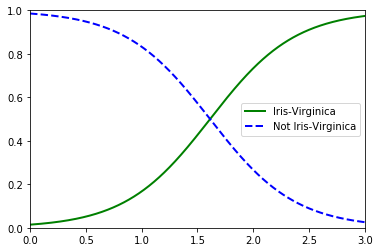

In [46]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X,y)

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1],'g-',linewidth=2, label='Iris-Virginica')
plt.plot(X_new, y_proba[:,0], 'b--',linewidth=2,label='Not Iris-Virginica')
plt.axis([0,3,0,1])
plt.legend(loc='best')
plt.show()

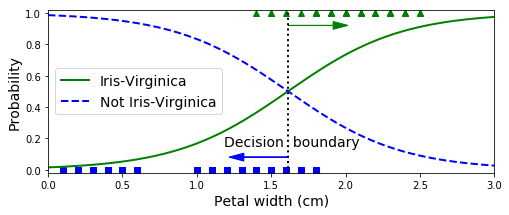

In [48]:
#practicing the above graph in a better representation manner
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

The petal widht of Iris-Virginica flowers (represented by triangles) ranges from 1.4cm to 2.5cm, while the other iris flowers (represented by squares) generally have a smaller petal width, ranging from 0.1cm to 1.8cm. Above about 2cm, the classifier is highly confident that the flower is an Iris-Virginica, while below 1cm it is highly confident that it is not an Iris-Virginica. In between these extremes, the classifier is unsure, which acts as decision boundary.

In [49]:
decision_boundary

array([1.61561562])

In [50]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

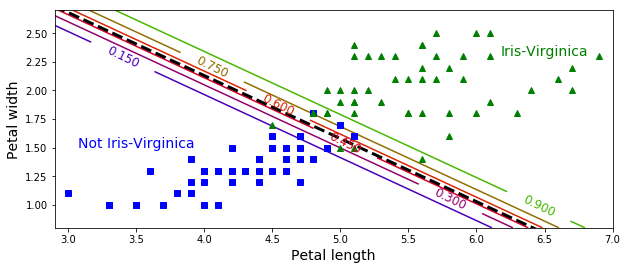

In [51]:
#visualizing Decision boundary
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

### Logistic Regression Models can be regularized using l1 or l2 penalties. Scikit-learn actually adds an l2 penalty by default

# 5. Softmax Regression
The Logistic regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called **Softmax Regression, or Multinomial Logistic Regression**

when given an instance **x**, the softmax regression model first computes a score S(x) for each class **k**, then estimates the probability of each class by applying the softmax function to the scores

Once you computed the score of every class for the instance X, you can estimate the probability P that the instance belongs to class k by running the scores through softmax functions.

In softmax regression, we use cross-entropy for loss function.

**Cross-entropy** is commonly used to quantify the difference between two probability distributions.

### Scikit-learn's LogisticRegression uses one-vs-all by default when you train it on more than two classes, but you can set the multi_class hyperparameter to "multinomial" to switch it to Softmax Regression instead

### implementation of Softmax Regression

In [52]:
X = iris['data'][:,(2,3)] #petal length, petal width
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

softmax_reg.predict([[5,2]])

array([2])

In [53]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

## Performance Measure for Regression Models:
1. Root Mean Square Error (RMSE)
2. Mean Square Error (MSE)
3. Coefficient of Determination (R2) = 1 - (Residual sum of squares)/(Total sum of squares)
4. Adjusted R2 score = 1 - (1-R2)(m-1)/(m-n-1)